### COCODataset Bounding-Box-Prior

In [1]:
import json
from collections import defaultdict
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [2]:
annotations = ['E:/yolov3-master/data/annotations/instances_train2014.json','E:/yolov3-master/data/annotations/instances_val2014.json']

In [4]:
# get bbox
bbx = []
annos = []
for anno in annotations:
    with open(anno, encoding='utf-8') as f:
        data = f.read()
        ad = json.loads(data)
        annos.append(ad)
    for image in ad['annotations']:
        x, y, width, height = image['bbox']
        if width == 0 or height == 0: # find out bbx with width/height == 0
            print(image)
            #print(x, y, width, height)
        bbx.append([width, height])

{'segmentation': [[9.98, 188.56, 15.52, 188.56, 15.52, 188.56, 11.09, 188.56]], 'area': 0.0, 'iscrowd': 0, 'image_id': 550395, 'bbox': [9.98, 188.56, 5.54, 0.0], 'category_id': 1, 'id': 2206849}
{'segmentation': [[296.65, 388.33, 296.65, 388.33, 297.68, 388.33, 297.68, 388.33]], 'area': 0.0, 'iscrowd': 0, 'image_id': 200365, 'bbox': [296.65, 388.33, 1.03, 0.0], 'category_id': 58, 'id': 918}


In [8]:
# find out images with 0 area
for ano in annos:
    for image in ano['images']:
        if image['id'] == 550395 or image['id'] == 200365:
            print(image)

{'license': 3, 'file_name': 'COCO_train2014_000000550395.jpg', 'coco_url': 'http://mscoco.org/images/550395', 'height': 429, 'width': 640, 'date_captured': '2013-11-18 21:29:33', 'flickr_url': 'http://farm1.staticflickr.com/31/62530940_8cf35b1ef6_z.jpg', 'id': 550395}
{'license': 3, 'file_name': 'COCO_val2014_000000200365.jpg', 'coco_url': 'http://mscoco.org/images/200365', 'height': 480, 'width': 640, 'date_captured': '2013-11-15 00:04:50', 'flickr_url': 'http://farm2.staticflickr.com/1177/1162747961_86300f56c8_z.jpg', 'id': 200365}


In [9]:
ad.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

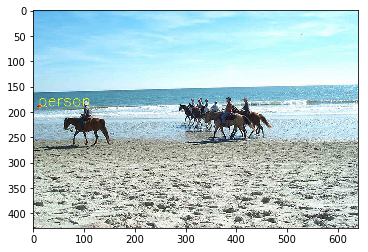

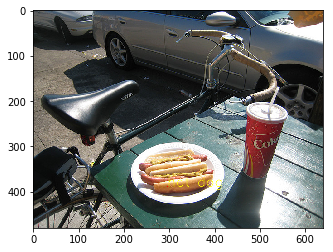

In [19]:
# show these two images
path = 'E:/yolov3-master/data/images/'
images = ['COCO_train2014_000000550395.jpg','COCO_val2014_000000200365.jpg']
boxes = [[9.98, 188.56, 5.54, 0.0],[296.65, 388.33, 1.03, 0.0]]
Cat = ['person','hot dog']

font = cv2.FONT_HERSHEY_SIMPLEX        
for img, box, cat in zip(images,boxes,Cat):
    img = mpimg.imread(img)
    x, y, w, h = box
    cv2.rectangle(img, (int(x),int(y)), (int(x+w),int(y+h)), (255,0,0), 2) # image, 左上顶点, 右下顶点, color, line_length
    cv2.putText(img, cat, (int(x),int(y)), font, 1, (255, 255, 0), 1, cv2.LINE_AA)
    plt.imshow(img)
    plt.show()

In [ ]:
### above two images are wrong annotated.

In [23]:
# Let's see all obj in these two images.
ANO1 = []
ANO2 = []
for ano in annos:
    for ad in ano['annotations']:
        if ad['image_id'] == 550395:
            ANO1.append([ad['bbox'], ad['category_id']])
            print(ad['bbox'], ad['category_id'])
        if ad['image_id'] == 200365:
            ANO2.append([ad['bbox'], ad['category_id']])
            print(ad['bbox'], ad['category_id'])

[61.07, 209.83, 89.73, 56.08] 19
[336.32, 195.41, 102.81, 61.44] 19
[393.02, 187.28, 80.26, 61.82] 19
[287.25, 184.86, 45.63, 41.94] 19
[305.49, 183.41, 9.48, 6.64] 19
[337.38, 189.07, 14.64, 46.9] 19
[90.95, 177.22, 23.92, 64.63] 1
[310.9, 175.06, 9.12, 15.46] 1
[366.57, 172.78, 25.51, 58.85] 1
[329.97, 174.87, 15.7, 31.24] 1
[348.83, 179.24, 21.18, 20.17] 1
[411.82, 172.79, 15.91, 38.2] 1
[321.15, 175.99, 14.49, 34.54] 1
[312.66, 190.71, 32.69, 48.57] 19
[9.98, 188.56, 5.54, 0.0] 1
[234.22, 317.11, 149.39, 38.55] 58
[239.48, 347.87, 160.0, 57.81] 58
[296.65, 388.33, 1.03, 0.0] 58
[251.87, 333.42, 125.94, 22.71] 58
[128.24, 192.99, 511.76, 281.33] 67
[0.0, 36.05, 562.4, 443.74] 2
[131.1, 0.0, 508.9, 248.77] 3
[1.08, 1.08, 130.81, 57.3] 3
[463.29, 202.06, 99.47, 170.41] 47


In [29]:
len(ANO1)

15

In [25]:
ANO1[0]

[[61.07, 209.83, 89.73, 56.08], 19]

In [30]:
ANO1[0][0]

[61.07, 209.83, 89.73, 56.08]

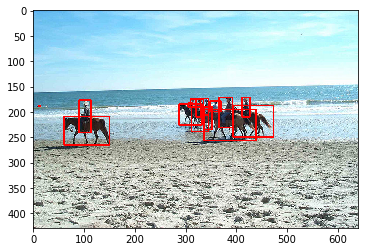

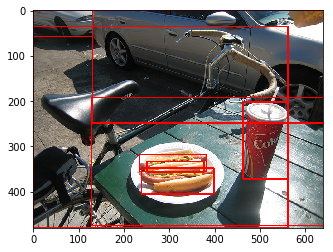

In [35]:
ANO = [ANO1, ANO2]

font = cv2.FONT_HERSHEY_SIMPLEX        
for img, ano in zip(images,ANO):
    img = mpimg.imread(img)
    for an in ano:
        x, y, w, h = an[0]
        cv2.rectangle(img, (int(x),int(y)), (int(x+w),int(y+h)), (255,0,0), 2) # image, 左上顶点, 右下顶点, color, line_length
    plt.imshow(img)
    plt.show()

In [10]:
len(bbx)

896782

In [36]:
bbx[0]

[285.3, 266.03]

In [37]:
bbx = np.array(bbx).reshape(len(bbx), 2)

In [38]:
bbx.shape

(896782, 2)

In [14]:
def kmeans(boxes, k, dist=np.median):
    """
    Calculates k-means clustering with the Intersection over Union (IoU) metric.
    param:
        boxes: numpy array of shape (r, 2), where r is the number of rows
        k: number of clusters
        dist: distance function
    return:
        numpy array of shape (k, 2)
    """
    rows = boxes.shape[0]

    distances = np.empty((rows, k))
    last_clusters = np.zeros((rows,))

    np.random.seed()

    # the Forgy method will fail if the whole array contains the same rows
    clusters = boxes[np.random.choice(rows, k, replace=False)]  # 9*2, random pick k clusters

    while True:
        for row in range(rows):
            distances[row] = 1 - iou(boxes[row], clusters)

        nearest_clusters = np.argmin(distances, axis=1)

        if (last_clusters == nearest_clusters).all():
            break

        for cluster in range(k):
            clusters[cluster] = dist(boxes[nearest_clusters == cluster], axis=0)

        last_clusters = nearest_clusters

    return clusters

In [15]:
def avg_iou(boxes, clusters):
    """
    Calculates the average Intersection over Union (IoU) between a numpy array of boxes and k clusters.
    param:
        boxes: numpy array of shape (r, 2), where r is the number of rows
        clusters: numpy array of shape (k, 2) where k is the number of clusters
    return:
        average IoU as a single float
    """
    return np.mean([np.max(iou(boxes[i], clusters)) for i in range(boxes.shape[0])])

In [16]:
def iou(box, clusters):
    """
    Calculates the Intersection over Union (IoU) between a box and k clusters.
    param:
        box: tuple or array, shifted to the origin (i. e. width and height)
        clusters: numpy array of shape (k, 2) where k is the number of clusters
    return:
        numpy array of shape (k, 0) where k is the number of clusters
    """
    x = np.minimum(clusters[:, 0], box[0])  # (9,)
    y = np.minimum(clusters[:, 1], box[1])  # (9,)
    
    #if np.count_nonzero(x == 0) > 0 or np.count_nonzero(y == 0) > 0:
        #raise ValueError("Box has no area")

    intersection = x * y # (9,)
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]  # (9,)

    iou_ = intersection / (box_area + cluster_area - intersection + 1e-10)

    return iou_

In [17]:
def get_kmeans(anno, cluster_num=9):

    anchors = kmeans(anno, cluster_num)
    ave_iou = avg_iou(anno, anchors)

    anchors = anchors.astype('int').tolist()

    anchors = sorted(anchors, key=lambda x: x[0] * x[1])

    return anchors, ave_iou

In [43]:
anchors, ave_iou = get_kmeans(bbx, 9)

In [45]:
ave_iou

0.6096750132388914

In [44]:
anchors

[[7, 8],
 [14, 20],
 [41, 24],
 [22, 46],
 [50, 63],
 [124, 76],
 [70, 141],
 [170, 206],
 [398, 342]]

### YOLOv3 paper: anchors: 10\*13, 16\*30, 33\*23, 30\*61, 62\*45, 59\*119, 116\*90, 156\*198, 373\*326

In [9]:
# shift to the origin
from tqdm import tqdm
bbox = []
for anno in tqdm(annos):
    for anoa in anno['annotations']:
        x, y, width, height = anoa['bbox']
        img_id = anoa['image_id']
        for anoi in anno['images']:
            if anoi['id'] == img_id:
                w, h = anoi['width'], anoi['height']
                break
        bbox.append([width/w, height/h])

100%|██████████| 2/2 [1:00:36<00:00, 2279.08s/it]


In [10]:
len(bbox)

896782

In [12]:
bbox[:10]

[[0.594375, 0.41567187499999997],
 [0.06271875, 0.03979166666666667],
 [0.42319999999999997, 0.8835466666666666],
 [0.16183333333333336, 0.119890625],
 [0.3594281045751634, 0.6867483660130719],
 [0.3426933333333333, 0.30924],
 [0.470703125, 0.7509882352941177],
 [0.171484375, 0.13655737704918033],
 [0.24266666666666667, 0.6519999999999999],
 [0.416390625, 0.3012028301886792]]

In [19]:
bbox = np.array(bbox).reshape(len(bbox), 2)

In [20]:
anchors, ave_iou = get_kmeans(bbox, 9)

In [21]:
ave_iou

0.6053989009759803

In [22]:
anchors

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]

##### get_kmeans()函数对结果取整，导致全为0

In [25]:
# dive into

cluster_num = 9
dist = np.median

bbx = np.array(bbx).reshape(len(bbx), 2)
rows = bbx.shape[0] # bbx:896782x2

distances = np.empty((rows, cluster_num))  # (896782, 9)
last_clusters = np.zeros((rows,))  # (896782,)

np.random.seed()

# the Forgy method will fail if the whole array contains the same rows
clusters = bbx[np.random.choice(rows, cluster_num, replace=False)]  # 9*2, random pick k clusters

while True:
    for row in range(rows):
        distances[row] = 1 - iou(bbx[row], clusters) # (9,)

    nearest_clusters = np.argmin(distances, axis=1) # (896782,)

    if (last_clusters == nearest_clusters).all():
        break

    for cluster in range(cluster_num):
        clusters[cluster] = dist(bbx[nearest_clusters == cluster], axis=0)  # like: array([460.63, 198.23]), will 

    last_clusters = nearest_clusters
    
ave_iou = np.mean([np.max(iou(bbx[i], clusters)) for i in range(bbx.shape[0])]) # 0.49857367211666076

anchors = clusters.astype('int').tolist() # int

In [28]:
anchors = sorted(anchors, key=lambda x: x[0] * x[1])

In [29]:
anchors

[[8, 10],
 [14, 29],
 [29, 17],
 [29, 59],
 [57, 37],
 [59, 120],
 [117, 75],
 [155, 195],
 [379, 333]]

In [30]:
ave_iou

0.6094776484864848